In [1]:
from d2l import torch as d2l
import torch
import random

### Generating the Dataset
$w= [2,-3.4]^{T},b=4.2$
$y = Xw+b+\epsilon$

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X ,w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0],'\label:', labels[0])

features: tensor([-1.1034,  0.1851]) \label: tensor([1.3544])


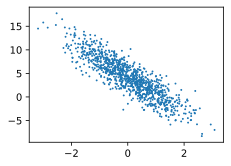

In [4]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:,1]), d2l.numpy(labels), 1)

### Reading the Dataset

In [5]:
# 生成随机打乱批次的索引号
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))

    #打乱顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i + batch_size,num_examples)]#防止越界
        )
        yield features[batch_indices], labels[batch_indices]

In [6]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X,'\n', y)
    break

tensor([[ 2.1012,  0.8789],
        [ 1.7674, -0.3980],
        [-0.0271, -0.2794],
        [ 0.5946, -0.3597],
        [-0.3851,  0.3949],
        [ 1.0086,  0.2436],
        [-0.3644, -0.7788],
        [-0.2678, -0.5263],
        [-0.6006,  1.2907],
        [-0.7082,  0.2018]]) 
 tensor([[ 5.4139],
        [ 9.0736],
        [ 5.0755],
        [ 6.6113],
        [ 2.0815],
        [ 5.3861],
        [ 6.1088],
        [ 5.4595],
        [-1.3754],
        [ 2.0940]])


### Initializing Model Parameters

In [7]:
# w = torch.normal(0 , 0.01, size=(2,1), requires_grad=True)
# b = torch.zeros(1, requires_grad=True)
# 初始化梯度为0时候
w = torch.zeros((2,1),requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### defining the model（定义模型）

In [8]:
def linreg(X, w, b):
    return torch.matmul(X,w)+b

### Defining the loss function定义损失函数

In [9]:
def squared_loss(y_hat, y):
    '''
    均方误差
    :param y_hat:
    :param y:
    :return:
    '''
    return (y_hat - y.reshape(y_hat.shape)) **2 /2

### Defining the optimization Algorithm(定义优化器)

In [10]:
def sgd(params, lr, batch_size):
    """
    Minibatch stochastic gradient descent
    小批量随机梯度下降
    :param params:
    :param lr:
    :param batch_size:
    :return:
    """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### Training(训练)
训练流程
- 初始化参数$（w,b）$
- 重复下述过程直到结束：
    - 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    - 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y)

        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss{float(train_l.mean()):f}')

epoch1, loss0.035563
epoch2, loss0.000145
epoch3, loss0.000050


In [12]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b- b}')

w的估计误差: tensor([ 0.0004, -0.0008], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0007], grad_fn=<RsubBackward1>)


### Exercises
1. What would happen if we were to initialize the weights to zero. Would the algorithm still work?

2. Assume that you are Georg Simon Ohm trying to come up with a model between voltage and current. Can you use auto differentiation to learn the parameters of your model?

3. Can you use Planck’s Law to determine the temperature of an object using spectral energy density?

What are the problems you might encounter if you wanted to compute the second derivatives? How would you fix them?

Why is the reshape function needed in the squared_loss function?

Experiment using different learning rates to find out how fast the loss function value drops.

If the number of examples cannot be divided by the batch size, what happens to the data_iter function’s behavior?

1. 初始化权重参数为0时候，算法还能正常运行
$w=0,b=0 ,y = wx+b,loss = (y-wx-b)^2 \times \frac{1}{2},\frac{\partial l}{\partial w}=(y-wx-b)*(-x)!=0$
2.

